In [1]:
from pylab import *

In [2]:
aa,af,aphi,ba,bf,bphi = loadtxt("AvF.txt", unpack=True)

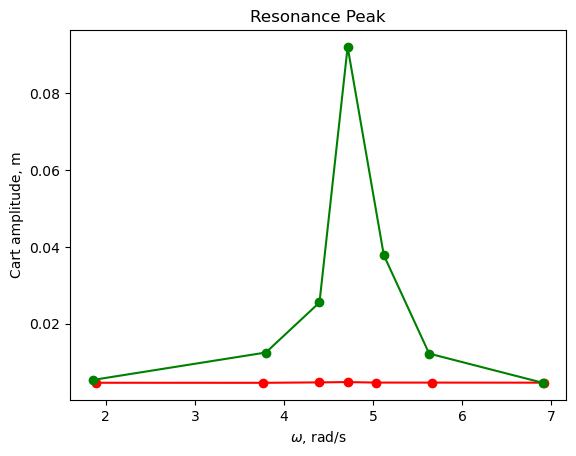

In [8]:
plot(af,aa,'ro-')
plot(bf,ba,'go-')
title('Resonance Peak')
xlabel(r'$\omega$, rad/s')
ylabel('Cart amplitude, m')
savefig('amplitude.pdf')

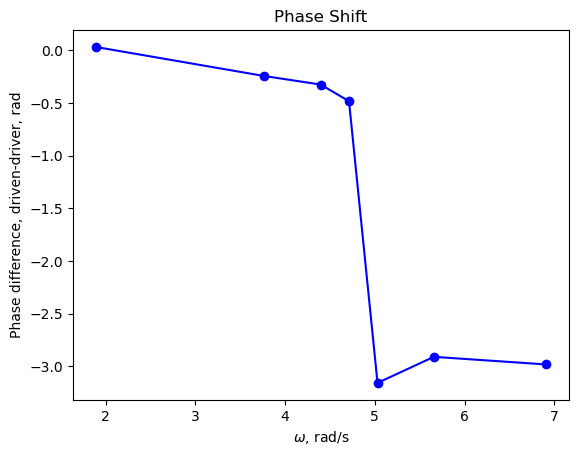

In [9]:
shift = bphi-aphi
for j in range(len(shift)):
    if shift[j]>pi:
        shift[j] = shift[j]-2*pi
        
plot(af,shift,'bo-')
title('Phase Shift')
xlabel(r'$\omega$, rad/s')
ylabel('Phase difference, driven-driver, rad')
savefig('phase.pdf')

In [15]:
aa,af,aphi,ba,bf,bphi = loadtxt("fscan.txt", unpack=True)

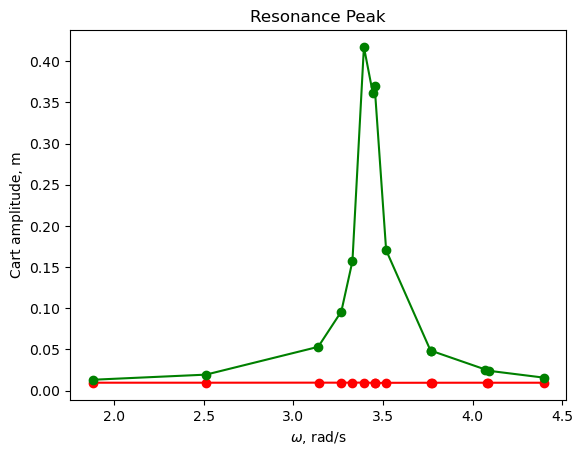

In [16]:
plot(af,aa,'ro-')
plot(bf,ba,'go-')
title('Resonance Peak')
xlabel(r'$\omega$, rad/s')
ylabel('Cart amplitude, m')
savefig('amplitude.pdf')

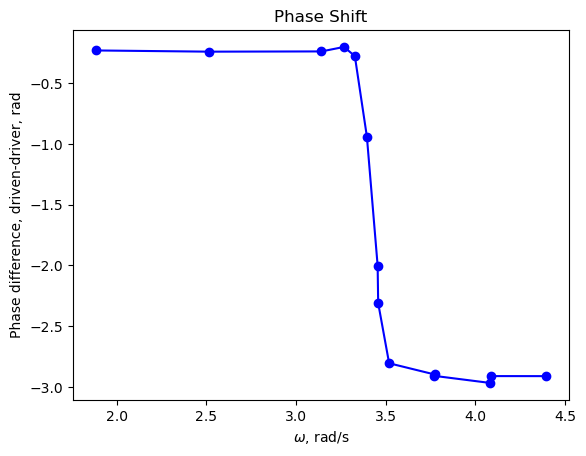

In [17]:
shift = bphi-aphi
for j in range(len(shift)):
    if shift[j]>pi:
        shift[j] = shift[j]-2*pi
        
plot(af,shift,'bo-')
title('Phase Shift')
xlabel(r'$\omega$, rad/s')
ylabel('Phase difference, driven-driver, rad')
savefig('phase.pdf')

In [25]:
servoPosition = loadtxt("dump.txt")
time, position, velocity, acceleration = loadtxt("cartMotion.txt", unpack=True, skiprows=1, delimiter=',')

In [30]:
position = array([0.00147032,  0.00661646,
        0.01102743,  0.01519334,  0.01837904,  0.02058453,  0.02156475,
        0.02082958,  0.0186241 ,  0.01519334,  0.01078237,  0.00612635,
        0.00098022, -0.00416592, -0.00882194, -0.01323291, -0.01690872,
       -0.0191142 , -0.02009442, -0.02009442, -0.01837904, -0.01592851,
       -0.01249775, -0.00857689, -0.00343075])

In [56]:
L = len(position)
x_values = arange(0,256,256/(L))

In [55]:
x_values

array([  0.        ,  10.66666667,  21.33333333,  32.        ,
        42.66666667,  53.33333333,  64.        ,  74.66666667,
        85.33333333,  96.        , 106.66666667, 117.33333333,
       128.        , 138.66666667, 149.33333333, 160.        ,
       170.66666667, 181.33333333, 192.        , 202.66666667,
       213.33333333, 224.        , 234.66666667, 245.33333333])

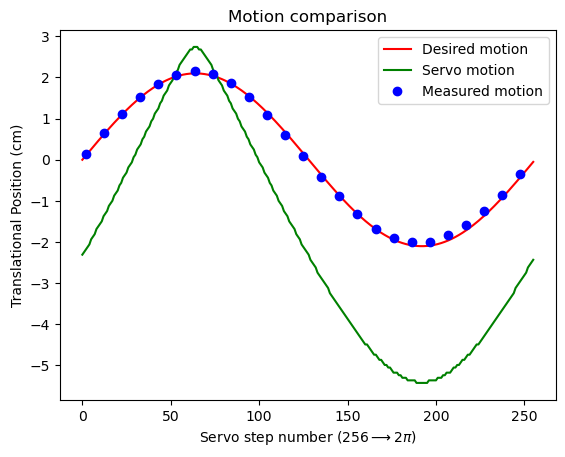

In [67]:
A = 2.1
f = 2*pi/256
n = arange(256)
servoX = 2.54*(servoPosition-127)*f
plot(n, A*sin(f*n), 'r-', label='Desired motion')
plot(n, servoX, 'g-', label='Servo motion')
plot(x_values+2, position*100, 'bo', label='Measured motion')
legend(loc='upper right')
ylabel("Translational Position (cm)")
xlabel("Servo step number ($256\longrightarrow 2\pi$)")
title("Motion comparison")
savefig("comparison.pdf")

In [68]:
dumbdata = loadtxt("dumb-smart-dumb.csv", delimiter=',', skiprows=1)

In [86]:
set1 = dumbdata[:,1]
set2 = dumbdata[:,5]
set3 = dumbdata[:,9]
set4 = dumbdata[:,13]

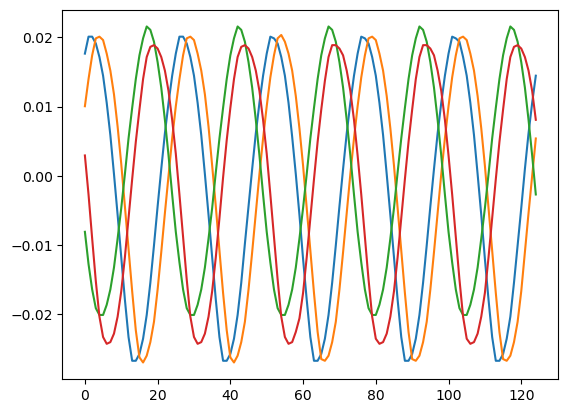

In [87]:
plot(set1)
plot(set2)
plot(set3)
plot(set4)

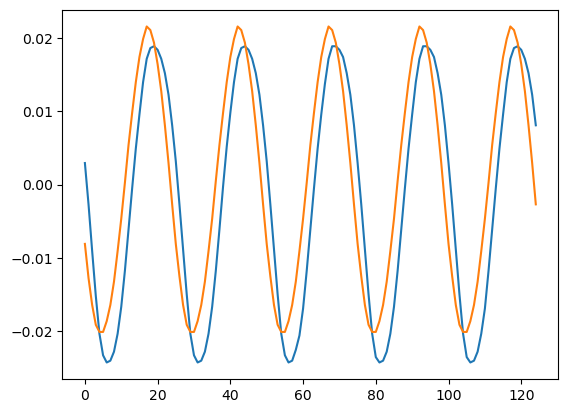

In [84]:
plot(dumb)
plot(smart)

In [74]:
len(dumb)

125

In [76]:
from scipy import fft

Text(0.5, 1.0, 'Power Spectrum')

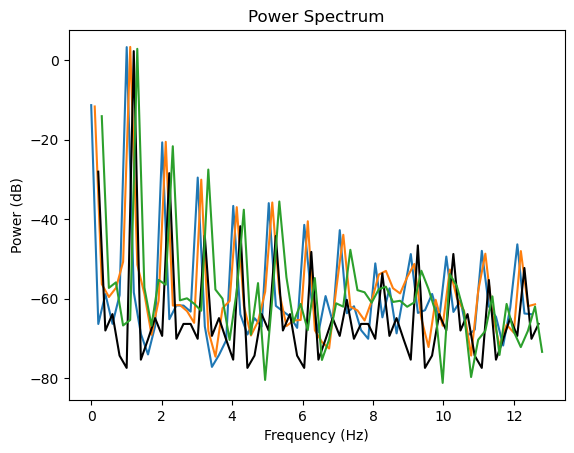

In [90]:
ps1 = 20*log10(abs(fft.rfft(set1)))
ps2 = 20*log10(abs(fft.rfft(set2)))
ps3 = 20*log10(abs(fft.rfft(set3)))
ps4 = 20*log10(abs(fft.rfft(set4)))
f = linspace(0, 25./2., len(ps))
plot(f, ps1)
plot(f+0.1, ps2)
plot(f+0.2, ps3, 'k')
plot(f+0.3, ps4)
xlabel('Frequency (Hz)')
ylabel('Power (dB)')
title('Power Spectrum')

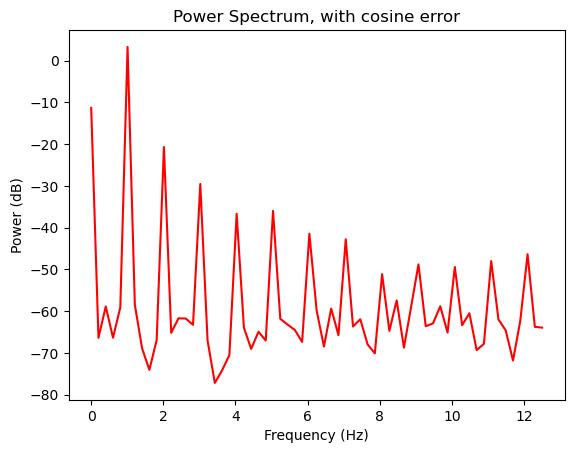

In [93]:
# unfixed stuff
plot(f, ps1, 'r')
xlabel('Frequency (Hz)')
ylabel('Power (dB)')
title('Power Spectrum, with cosine error')
savefig('ps_cosine_error.pdf')

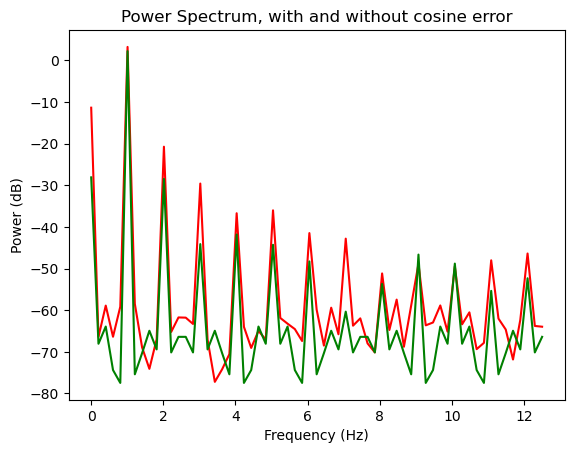

In [94]:
# fixed one in green
plot(f, ps1, 'r')
plot(f, ps3, 'g')
xlabel('Frequency (Hz)')
ylabel('Power (dB)')
title('Power Spectrum, with and without cosine error')
savefig('ps_fixed.pdf')

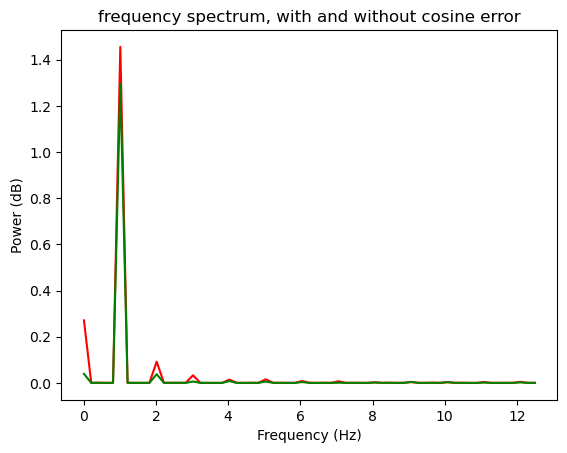

In [97]:
# not dB
plot(f, abs(fft.rfft(set1)), 'r')
plot(f, abs(fft.rfft(set3)), 'g')
xlabel('Frequency (Hz)')
ylabel('Power (dB)')
title('frequency spectrum, with and without cosine error')
savefig('fs_fixed.pdf')

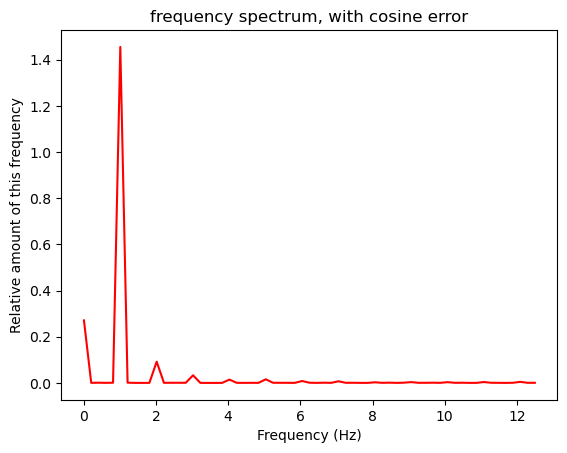

In [107]:
# not dB
plot(f, abs(fft.rfft(set1)), 'r')
#plot(f, abs(fft.rfft(set3)), 'g')
xlabel('Frequency (Hz)')
ylabel('Relative amount of this frequency')
title('frequency spectrum, with cosine error')
savefig('fs_dumb.pdf')

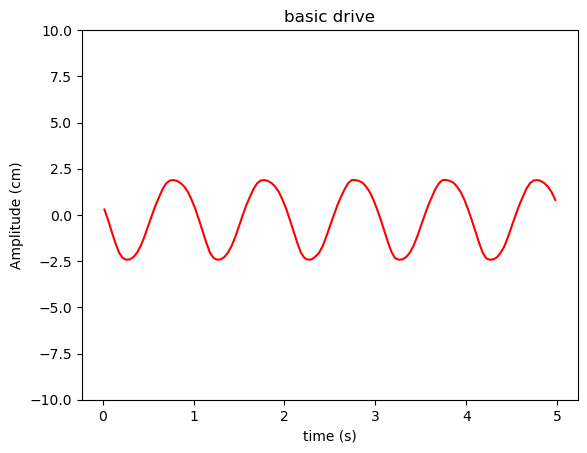

In [106]:
plot(dumbdata[:,0],set4*100, 'r')
ylim(-10,10)
ylabel("Amplitude (cm)")
xlabel("time (s)")
title("basic drive")
savefig("basic.pdf")